## **About This Project**

**Background**

This project will focus on clinical variables that might be one of the factors to predict heart failure earlier. 

**Data Overview**

1. Age : Age of patient
2. Anemia : If patient has anemia (decrease of red blood cells or hemoglobin)
3. Creatinine_pospokinase : level of creatine in blood that can indicate there are injury from brain,heart,or muscle (mcg/L).
4. Diaetes : if patient has diabetes
5. Ejection_fraction : Percentage of blood leaving the hearth at each heart muscle constraction (percentage)
6. High_blood_pressure : if the patient has hypertension history
7. Platelets : level of platelets in blood (kiloplatelets/mL).
8. Serum_creatinine : level of serum creatinine in blood that can measure how good kidney function (mg/dL).
9. Serum_sodium : Level of serum sodium in the blood that can measure balance of electrolyte and water in blood vessels (mEq/L).
10. Sex : Women or Man (Non biner is not accepted)
11. Smoking : if the patient is smoker or not
12. Time : Follow-up perioed (days)
13. Death_event : if the patient deceased during the folloe-up period

## **Preparation**

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Load Dataset

In [147]:
# Load data
sc= r'C:\Users\fahru\Documents\Python_Code\Prediction Model\heart_failure_clinical_records_dataset.csv'
data=pd.read_csv(sc)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**NOTE**

Drop time column because only focus on clinical variables.

In [149]:

datac= data.drop(columns='time')
datac.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


### Data Understanding

**NOTE**

Patient clasified on 'Death_Event':

- 0 : survived patient 
- 1 : deceased patient

Patient clasified by sex:

- 0 : Women 
- 1 : Male

Patient clasified on another bolean data type(aneamia,diabetes,high_blood_fraction,smoking)

- 0 : Absence
- 1 : Presence

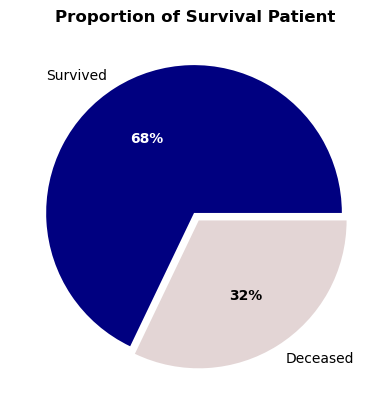

In [150]:
# Survival Rate Patient

surv= datac.groupby('DEATH_EVENT')['sex'].count().reset_index(name='Number of Patient')

_,labels,autopct= plt.pie(x=surv['Number of Patient'], autopct='%.0f%%', labels=['Survived','Deceased'],
            colors=['navy',"#E3D5D5"], explode=(0.01,0.05))
plt.setp(autopct[0], color='white', weight='bold')
plt.setp(autopct[1], weight='bold')

plt.title('Proportion of Survival Patient', fontdict={'weight':'bold'})
plt.show()

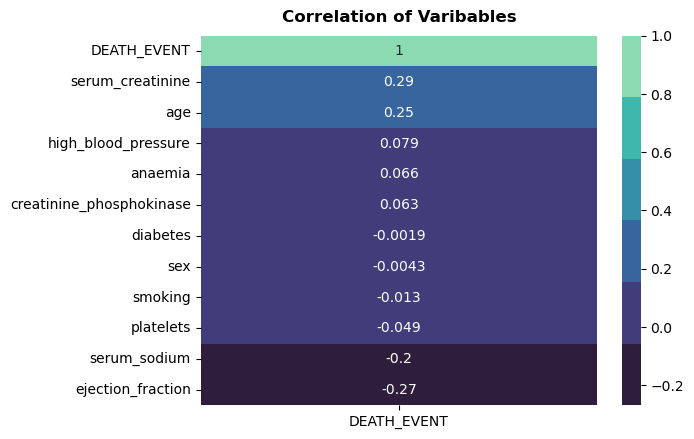

In [151]:
# Correlation Between Death Event Variable and Each Other
from sklearn.preprocessing import LabelEncoder

encod= LabelEncoder()
dd= datac.copy()
dd['DEATH_EVENT']= encod.fit_transform(dd['DEATH_EVENT'])

sns.heatmap(dd.corr().sort_values('DEATH_EVENT',ascending=False)[['DEATH_EVENT']], annot=True, cmap=sns.color_palette('mako'))
plt.title('Correlation of Varibables', pad=10, weight='bold')
plt.show()

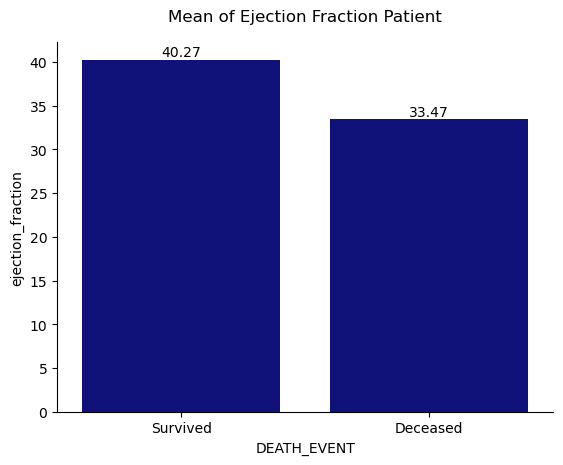

In [152]:
# Proportion of ejection_fractaion 
ejec= datac.groupby('DEATH_EVENT')['ejection_fraction'].mean().round(2).reset_index()
ax= sns.barplot(data=ejec, x='DEATH_EVENT', y='ejection_fraction', color='darkblue')
for x in ax.containers:
    ax.bar_label(x)
plt.xticks(ticks=ejec['DEATH_EVENT'], labels=['Survived','Deceased'])

plt.title('Mean of Ejection Fraction Patient', pad=15)
sns.despine(bottom=False, left=False)
plt.show()

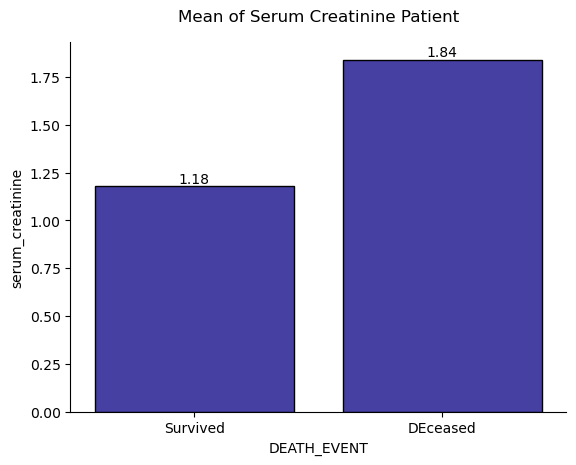

In [153]:
# Proportionn of Serum Creatine

serum= datac.groupby('DEATH_EVENT')['serum_creatinine'].mean().round(2).reset_index()
ax= sns.barplot(data=serum, x='DEATH_EVENT', y='serum_creatinine', color="#3930B3", edgecolor='black')
for x in ax.containers:
    ax.bar_label(x)
plt.xticks(ticks=serum['DEATH_EVENT'], labels=['Survived','DEceased'])

plt.title('Mean of Serum Creatinine Patient', pad=15)
sns.despine(bottom=False, left=False)
plt.show()

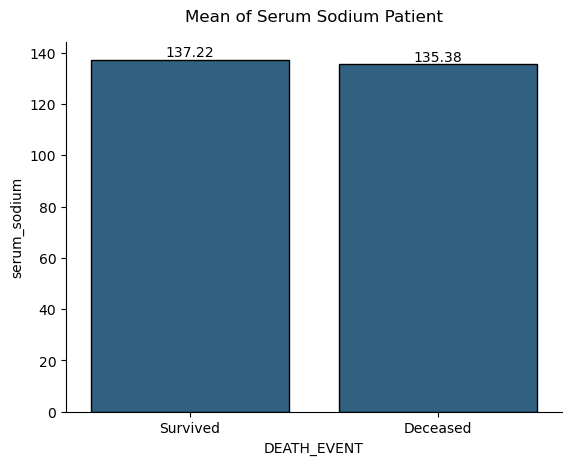

In [154]:
# Proportionn of Serum Sodium

serum= datac.groupby('DEATH_EVENT')['serum_sodium'].mean().round(2).reset_index()
ax= sns.barplot(data=serum, x='DEATH_EVENT', y='serum_sodium', color="#23648D", edgecolor='black')
for x in ax.containers:
    ax.bar_label(x)
plt.xticks(ticks=serum['DEATH_EVENT'], labels=['Survived','Deceased'])

plt.title('Mean of Serum Sodium Patient', pad=15)
sns.despine(bottom=False, left=False)
plt.show()

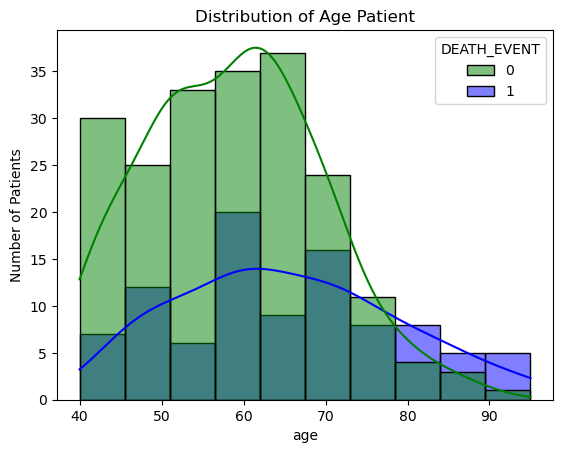

In [164]:
# Distribution of Age Patient
ax= sns.histplot(data=datac, x='age', hue='DEATH_EVENT',kde=True, palette=['green','blue'])
plt.ylabel('Number of Patients')

plt.title('Distribution of Age Patient')
plt.show()